In [6]:

#generate data do compare network quality
import sys
import numpy as np
sys.path.insert(0, '../../helperScripts/')
sys.path.insert(0,'/home/t.stohn/Tools/CPLEX_Studio201/cplex/python/3.8/x86-64_linux')

from helperFunctions import *


In [7]:
%%capture

#cell number for each group (wt and braf each)
CELLNUM = 10
NOISE = 0.5

cell_annot = None
cell_annot = {
     'ctr': list(rglob_wt.columns) + list(rglob_braf.columns), 
     'rasi': list(rglob_wt_rasi.columns) + list(rglob_braf_rasi.columns), 
     'p90i': list(rglob_wt_p90i.columns) + list(rglob_braf_p90i.columns)
 }

#tx_annot = None
tx_annot = {'ctr': None, 'rasi': 'Ras', 'p90i': 'P90Rsk'}

# Combine the data in single data-frame
rglob_wt, rtot_wt, x           = prepare_orton_data(wt, CELLNUM, NOISE, cell_annot, tx_annot)
# rglob_wt_rasi, rtot_wt_rasi = prepare_orton_data(wt_rasi, 10)
# rglob_wt_p90i, rtot_wt_p90i = prepare_orton_data(wt_p90i, 10)
rglob_braf, rtot_braf, x        = prepare_orton_data(braf, CELLNUM, NOISE, cell_annot, tx_annot)
# rglob_braf_rasi, rtot_braf_rasi = prepare_orton_data(braf_rasi, 10)
# rglob_braf_p90i, rtot_braf_p90i = prepare_orton_data(braf_p90i, 10)
rglob_ras, rtot_ras, x         = prepare_orton_data(ras, CELLNUM, NOISE, cell_annot, tx_annot)

rglob = pd.concat([rglob_wt, rglob_braf,rglob_ras], axis=1)
rtot = pd.concat([rtot_wt, rtot_braf,rtot_ras], axis=1) 
print(rglob)

group_annot = {
    "wt": list(rglob_wt.columns),
    "braf": list(rglob_braf.columns),
    "ras": list(rglob_ras.columns) 
    }

print(group_annot)
#IF WE NEED TO REMOVE MISSING NODES
    #rtot = rtot.drop(missingNodes, axis=0)

eta = 0.1
theta = 0.0
scd = scmra.ScData(rglob=rglob, rtot = rtot, cell_annot=cell_annot, tx_annot=tx_annot, group_annot= group_annot)
p = scmra.ScCnrProblem(scd, eta=eta, theta=theta) 
p.cpx.solve()
p.cpx.write("testCnr.lp")

s = scmra.ScCnrResult(p)


AttributeError: 'NoneType' object has no attribute 'items'

In [8]:
vars_lst = [var for var in s.vardict if var.startswith('IDev')]
print(vars_lst)
vars_vals = [s.vardict[v] for v in vars_lst]
print(vars_vals)
lengthIdcs = (np.count_nonzero(var_vals))
print(lengthIdcs)


['IDev_Sos_Ras', 'IDev_Sos_Raf1', 'IDev_Sos_Mek', 'IDev_Sos_Erk', 'IDev_Sos_P90Rsk', 'IDev_Sos_PI3K', 'IDev_Sos_Akt', 'IDev_Sos_C3G', 'IDev_Sos_Rap1', 'IDev_Sos_bRaf', 'IDev_Ras_Sos', 'IDev_Ras_Raf1', 'IDev_Ras_Mek', 'IDev_Ras_Erk', 'IDev_Ras_P90Rsk', 'IDev_Ras_PI3K', 'IDev_Ras_Akt', 'IDev_Ras_C3G', 'IDev_Ras_Rap1', 'IDev_Ras_bRaf', 'IDev_Raf1_Sos', 'IDev_Raf1_Ras', 'IDev_Raf1_Mek', 'IDev_Raf1_Erk', 'IDev_Raf1_P90Rsk', 'IDev_Raf1_PI3K', 'IDev_Raf1_Akt', 'IDev_Raf1_C3G', 'IDev_Raf1_Rap1', 'IDev_Raf1_bRaf', 'IDev_Mek_Sos', 'IDev_Mek_Ras', 'IDev_Mek_Raf1', 'IDev_Mek_Erk', 'IDev_Mek_P90Rsk', 'IDev_Mek_PI3K', 'IDev_Mek_Akt', 'IDev_Mek_C3G', 'IDev_Mek_Rap1', 'IDev_Mek_bRaf', 'IDev_Erk_Sos', 'IDev_Erk_Ras', 'IDev_Erk_Raf1', 'IDev_Erk_Mek', 'IDev_Erk_P90Rsk', 'IDev_Erk_PI3K', 'IDev_Erk_Akt', 'IDev_Erk_C3G', 'IDev_Erk_Rap1', 'IDev_Erk_bRaf', 'IDev_P90Rsk_Sos', 'IDev_P90Rsk_Ras', 'IDev_P90Rsk_Raf1', 'IDev_P90Rsk_Mek', 'IDev_P90Rsk_Erk', 'IDev_P90Rsk_PI3K', 'IDev_P90Rsk_Akt', 'IDev_P90Rsk_C3G', '

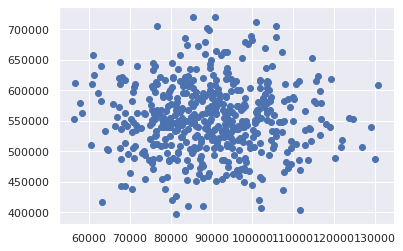

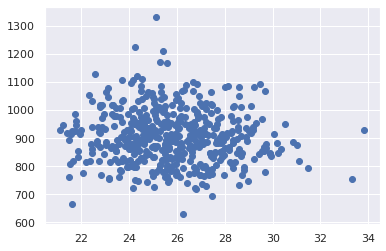

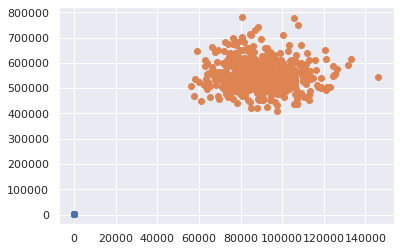

In [3]:
#DISTRIBUTION OF RAW DATA POINTS
plt.scatter(braf["bRafActive"].sample(500), braf["MekActive"].sample(500))
plt.show()
plt.scatter(wt["bRafActive"].sample(500), wt["MekActive"].sample(500))
plt.show()

plt.scatter(wt["bRafActive"].sample(500), wt["MekActive"].sample(500))
plt.scatter(braf["bRafActive"].sample(500), braf["MekActive"].sample(500))


wt RLOC:

0.1308129639960727
braf RLOC:

0.12086072346503052


<Figure size 432x288 with 0 Axes>

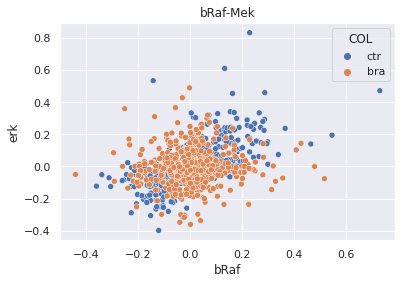

<Figure size 432x288 with 0 Axes>

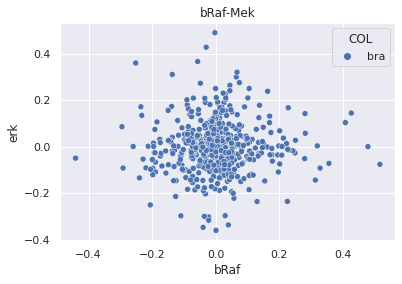

<Figure size 432x288 with 0 Axes>

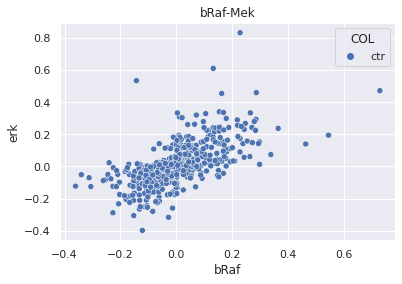

<Figure size 432x288 with 0 Axes>

In [4]:
#DISTRIBUTION OF CORRECTED DATA POINTS
generate_overview_cnr(s)

brafPoints= s.rglob.loc["Mek",:]
erkPoints= s.rglob.loc["Erk",:]
d = {'bRaf':brafPoints,'erk':erkPoints}
df = pd.DataFrame(d)
df["COL"] = df.index.str[:3]
plt.figure()
sns.scatterplot(data=df, x="bRaf", y="erk", hue="COL").set(title='bRaf-Mek')
plt.figure()

brafPoints= rglob_braf.loc["Mek",:]
erkPoints= rglob_braf.loc["Erk",:]
d = {'bRaf':brafPoints,'erk':erkPoints}
df = pd.DataFrame(d)
df["COL"] = df.index.str[:3]
plt.figure()
sns.scatterplot(data=df, x="bRaf", y="erk", hue="COL").set(title='bRaf-Mek')
plt.figure()

brafPoints= rglob_wt.loc["Mek",:]
erkPoints= rglob_wt.loc["Erk",:]
d = {'bRaf':brafPoints,'erk':erkPoints}
df = pd.DataFrame(d)
df["COL"] = df.index.str[:3]
plt.figure()
sns.scatterplot(data=df, x="bRaf", y="erk", hue="COL").set(title='bRaf-Mek')
plt.figure()

Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIQP Presolve eliminated 0 rows and 1 columns.
Reduced MIQP has 5500 rows, 5731 columns, and 66000 nonzeros.
Reduced MIQP has 110 binaries, 0 generals, 0 SOSs, and 110 indicators.
Reduced MIQP objective Q matrix has 5500 nonzeros.
Presolve time = 0.05 sec. (18.66 ticks)
Probing time = 0.01 sec. (1.03 ticks)
Tried aggregator 1 time.
Reduced MIQP has 5500 rows, 5731 columns, and 66000 nonzeros.
Reduced MIQP has 110 binaries, 0 generals, 0 SOSs, and 110 indicators.
Reduced MIQP objective Q matrix has 5500 nonzeros.
Presolve time = 0.05 sec. (17.99 ticks)
Classifier predicts products in MIQP should be linearized.
Probing time = 0.00 sec. (1.03 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 32 threads.
Root relaxation solution time = 0.31 sec. (452.80 ticks)

        Nodes     

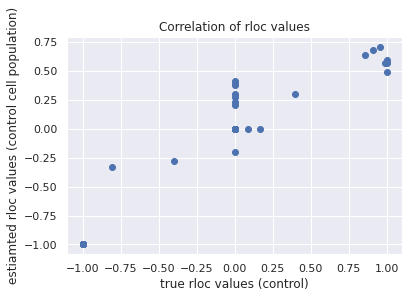

stot: 
             Sos       Ras      Raf1       Mek       Erk    P90Rsk     PI3K  \
Sos     0.360346         0         0         0         0         0        0   
Ras            0  0.163823         0         0         0         0        0   
Raf1           0         0  0.327226         0         0         0        0   
Mek            0         0         0  0.657943         0         0        0   
Erk            0         0         0         0  0.403808         0        0   
P90Rsk         0         0         0         0         0  0.616548        0   
PI3K           0         0         0         0         0         0  0.82568   
Akt            0         0         0         0         0         0        0   
C3G            0         0         0         0         0         0        0   
Rap1           0         0         0         0         0         0        0   
bRaf           0         0         0         0         0         0        0   

             Akt       C3G      Rap1      bR

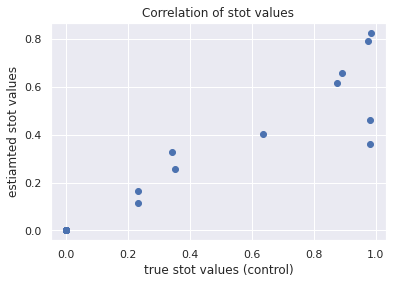

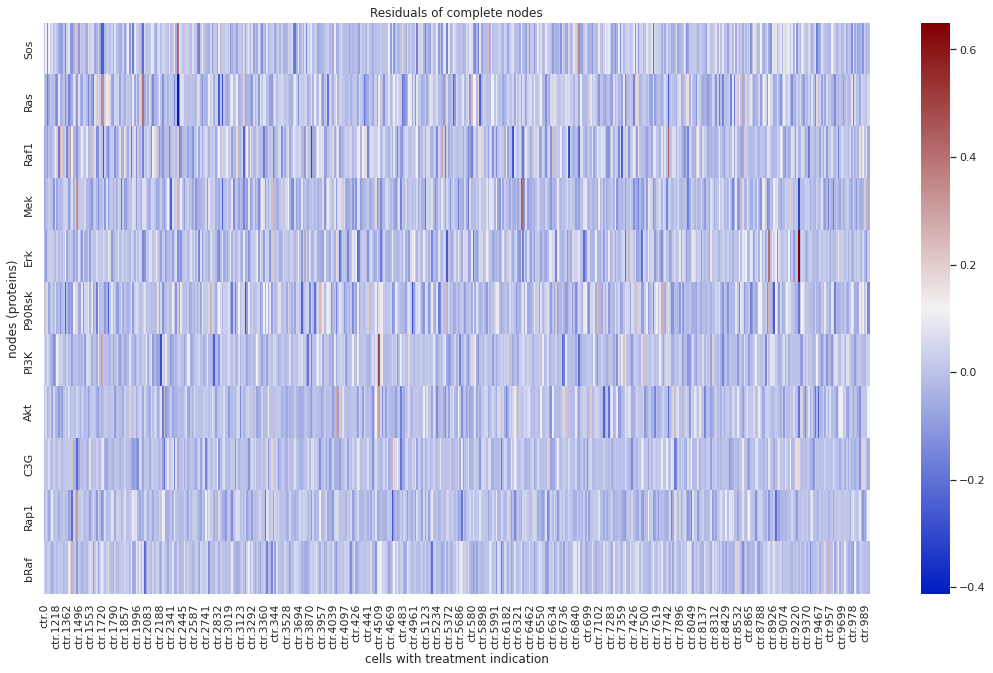

PERTURBATION STRENGTH: 


In [5]:
# if we only model the wt we have a similar result
scd = scmra.ScData(rglob=rglob_wt, rtot = rtot_wt, cell_annot=cell_annot, tx_annot=tx_annot)
p = scmra.ScMraProblem(scd, eta=eta) 
p.cpx.solve()
s = scmra.ScMraResult(p)

generate_overview(s)

SOLVE FOR ETA: 0.1
estimated alpha is: 1.0
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 139.505746 after 0.04 sec. (4.07 ticks)
Tried aggregator 2 times.
MIQP Presolve eliminated 0 rows and 1 columns.
MIQP Presolve modified 121 coefficients.
Aggregator did 462 substitutions.
Reduced MIQP has 22704 rows, 23639 columns, and 265991 nonzeros.
Reduced MIQP has 1155 binaries, 0 generals, 0 SOSs, and 1386 indicators.
Reduced MIQP objective Q matrix has 22000 nonzeros.
Presolve time = 0.45 sec. (184.49 ticks)
Probing time = 0.05 sec. (2.89 ticks)
Tried aggregator 2 times.
Aggregator did 121 substitutions.
Reduced MIQP has 22583 rows, 23518 columns, and 265749 nonzeros.
Reduced MIQP has 1155 binaries, 0 generals, 0 SOSs, and 1386 indicators.
Reduced MIQP objective Q matrix has 22000 nonzeros.
Presolve time = 0.44 sec. (177.88 ticks)
Classifier predicts products in MIQP should be linearized.
Probing time = 0.04 

/DATA/t.stohn/MRA/scMRA-analysis/notebooks/paperAnalyses/CNRAnalysis/../../helperScripts/helperFunctions.py:688: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b* np.power(x,c)) + d


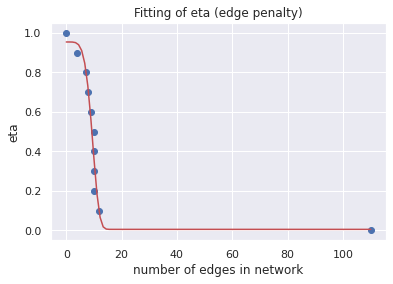

TypeError: can only concatenate str (not "NoneType") to str

In [3]:
# SMALL CHECK ON THE ETA ESTIMATION FOR CNR

noise = 0.1
cell = 1000

#generate the raw data
rglob_wt, rtot_wt     = prepare_orton_data2(wt, cell, noise)
rglob_braf, rtot_braf = prepare_orton_data2(braf, cell, noise)
rglob = pd.concat([rglob_wt, rglob_braf], axis=1)
rtot = pd.concat([rtot_wt, rtot_braf], axis=1) 
group_annot = {
    "wt": list(rglob_wt.columns),
    "braf": list(rglob_braf.columns) 
    }
cell_annot = None
tx_annot = None

theta = 0.0
scd = scmra.ScData(rglob=rglob, rtot = rtot, cell_annot=cell_annot, tx_annot=tx_annot, group_annot= group_annot)

#could be estimated outside of loop for performance increase, however, we left it here for consistency and
#independent eta estimation for the different single cell subsets
eta, etaListNew = estimate_eta_cnr(rglob, rtot, cell_annot, tx_annot, group_annot, withFlattening = True,
                                   etasInput = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])


In [13]:

#function to simulate a CNR with a defined set of populations among the possible ones=[wt, ras, braf]
def simulate_cnr(cellPopulationList, noise, cell):
    #generate the raw data
    pertIndices = None
    rglob, rtot, group_annot, cell_annot, tx_annot = generate_cnr_data(cell, pertIndices, noise, cellPopulationList)

    theta = 0.0
    scd = scmra.ScData(rglob=rglob, rtot = rtot, cell_annot=cell_annot, tx_annot=tx_annot, group_annot= group_annot)

    #eta must be estimated for every simulation bcs. we can have different missing proteins
    etasInput = [0.75, 0.85, 0.1, 0.15, 0.2, 0.2, 0.3, 0.3, 0.35, 0.4, 0.5]
    eta, etaListNew = estimate_eta_cnr(rglob, rtot, cell_annot, tx_annot, group_annot, withFlattening = True, etasInput=etasInput)

    #make MRA simulation
    p = scmra.ScCnrProblem(scd, eta=eta, theta=theta) 
    p.cpx.solve()
    s = scmra.ScCnrResult(p)

    #add values to result
    #GET NUMBER EDGES IN THIS NETWORK
    numEdges = 0
    exampleRloc = list(s.rloc.values())[0]
    for column_name in exampleRloc:
        column = exampleRloc[column_name]
        numEdges += (column != 0).sum()
        numEdges -=1 #for the diagonal values

    populationString = ""
    for population in cellPopulationList:
        populationString += ','
        populationString += population

    return(numEdges)


SOLVE FOR ETA: 0.75
estimated alpha is: 1.0
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 54.756397 after 0.08 sec. (6.10 ticks)
Tried aggregator 2 times.
MIQP Presolve eliminated 0 rows and 1 columns.
Aggregator did 693 substitutions.
Reduced MIQP has 34056 rows, 35343 columns, and 399531 nonzeros.
Reduced MIQP has 1617 binaries, 0 generals, 0 SOSs, and 2079 indicators.
Reduced MIQP objective Q matrix has 33000 nonzeros.
Presolve time = 0.60 sec. (274.25 ticks)
Probing time = 0.03 sec. (4.29 ticks)
Tried aggregator 1 time.
Reduced MIQP has 34056 rows, 35343 columns, and 399531 nonzeros.
Reduced MIQP has 1617 binaries, 0 generals, 0 SOSs, and 2079 indicators.
Reduced MIQP objective Q matrix has 33000 nonzeros.
Presolve time = 0.35 sec. (158.19 ticks)
Classifier predicts products in MIQP should be linearized.
Probing time = 0.02 sec. (4.28 ticks)
Clique table members: 693.
MIP emphasis: balance optimalit

/DATA/t.stohn/MRA/scMRA-analysis/notebooks/paperAnalyses/CNRAnalysis/../../helperScripts/helperFunctions.py:883: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b* np.power(x,c)) + d


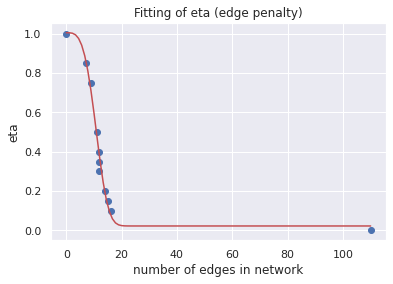

estimated alpha is: 1.0
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 158.962743 after 0.08 sec. (6.10 ticks)
Tried aggregator 2 times.
MIQP Presolve eliminated 0 rows and 1 columns.
Aggregator did 693 substitutions.
Reduced MIQP has 34056 rows, 35343 columns, and 399531 nonzeros.
Reduced MIQP has 1617 binaries, 0 generals, 0 SOSs, and 2079 indicators.
Reduced MIQP objective Q matrix has 33000 nonzeros.
Presolve time = 0.57 sec. (274.25 ticks)
Probing time = 0.03 sec. (4.29 ticks)
Tried aggregator 1 time.
Reduced MIQP has 34056 rows, 35343 columns, and 399531 nonzeros.
Reduced MIQP has 1617 binaries, 0 generals, 0 SOSs, and 2079 indicators.
Reduced MIQP objective Q matrix has 33000 nonzeros.
Presolve time = 0.30 sec. (158.19 ticks)
Classifier predicts products in MIQP should be linearized.
Probing time = 0.02 sec. (4.28 ticks)
Clique table members: 693.
MIP emphasis: balance optimality and feasibility.


In [14]:
numEdges = simulate_cnr(["braf", "ras", "wt"], 0.2, 1000)
print(numEdges)


CHECK HOW TO GET FASTER ETA ESTIMATES, eems to work pretty well

In [3]:
%%capture
rglob, rtot, group_annot, cell_annot, tx_annot = generate_cnr_data(1000, None, 0.2, ["wt","braf"])

eta, etaListNew = estimate_eta_fast(rglob, rtot, cell_annot, tx_annot, group_annot, reconstructionType = "CNR")


In [1]:
print(eta)
#print(etaListNew.imap.sum().sum())
if(etaListNew == None):
    print("NONE")

scd = scmra.ScData(rglob=rglob, rtot=rtot, cell_annot=cell_annot, tx_annot=tx_annot, group_annot=group_annot)
p = scmra.ScCnrProblem(scd, eta=eta, theta=0.0) 
p.cpx.solve()
s = scmra.ScCnrResult(p)

#add values to result
#GET NUMBER EDGES IN THIS NETWORK
numEdges = 0
exampleRloc = list(s.rloc.values())[0]
for column_name in exampleRloc:
    column = exampleRloc[column_name]
    numEdges += (column != 0).sum()
    numEdges -=1 #for the diagonal values
print(numEdges)

NameError: name 'eta' is not defined

In [22]:
print(s.imap)

        Sos  Ras  Raf1  Mek  Erk  P90Rsk  PI3K  Akt  C3G  Rap1  bRaf
Sos       0    1     0    0    0       1     0    0    0     0     0
Ras       1    0     0    0    0       0     0    0    0     0     0
Raf1      0    1     0    0    0       0     0    1    0     0     0
Mek       0    0     1    0    0       0     0    0    1     1     1
Erk       0    0     0    1    0       0     0    0    0     0     0
P90Rsk    0    0     0    0    1       0     0    0    0     0     0
PI3K      0    0     0    0    0       0     0    0    0     0     0
Akt       0    0     0    0    0       0     1    0    0     0     0
C3G       0    0     0    0    0       0     0    0    0     0     0
Rap1      0    0     0    0    0       0     0    0    1     0     0
bRaf      0    1     0    0    0       0     0    0    0     1     0


In [4]:
%%capture
#THETA ANALYSIS
#just testing how to set the theta for CNR>MRA analysis
#initially choose an eta of 0.044 as this results in 13 edges for a theta of 0
#then see how with this eta theta evolves...

#increased CNR later to 1000 cells and 0.3 noise
#eta of 0.1 is a good estimate, then estimate a good theta for this...

rglob, rtot, group_annot,cell_annot,tx_annot =  generate_cnr_data(1000, None, 0.3, populationList = ["wt", "braf"])

eta = 0.1
theta = 0.0
thetaRange = [0.001, 0.005, 0.01, 0.05,  0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
errorList = []
diffEdgeListTreat = []
for theta in thetaRange:

    scd = scmra.ScData(rglob=rglob, rtot = rtot, cell_annot=cell_annot, tx_annot=tx_annot, group_annot= group_annot)
    p = scmra.ScCnrProblem(scd, eta=eta, theta=theta) 
    p.cpx.solve()
    s = scmra.ScCnrResult(p)

    n_res = np.size(s.residuals_complete) + np.size(s.residuals_incomplete)
    error = 0
    error += np.sum(np.array(np.square(s.residuals_complete)))/n_res
    error += np.sum(np.array(np.square(s.residuals_incomplete)))/n_res
    errorList.append(error)

    var_names = p.cpx.variables.get_names()
    vars_lst = [var for var in var_names if var.startswith('IDev')]
    var_vals = p.cpx.solution.pool.get_values(0, vars_lst)
    lengthIdcs = (np.count_nonzero(var_vals))
    diffEdgeListTreat.append(lengthIdcs)

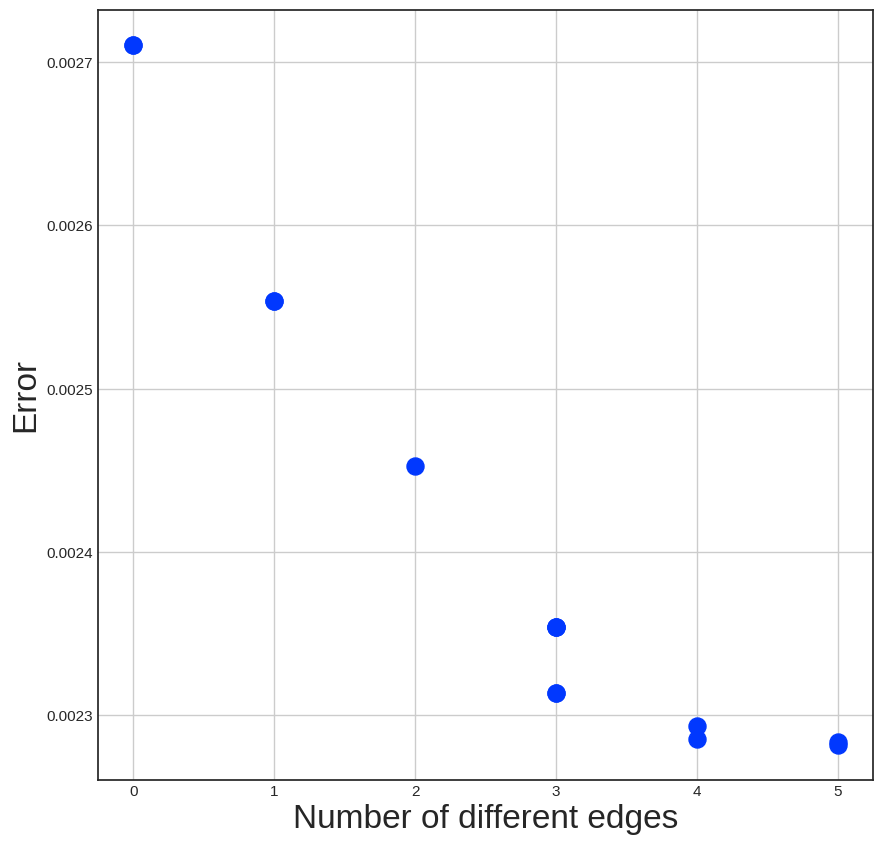

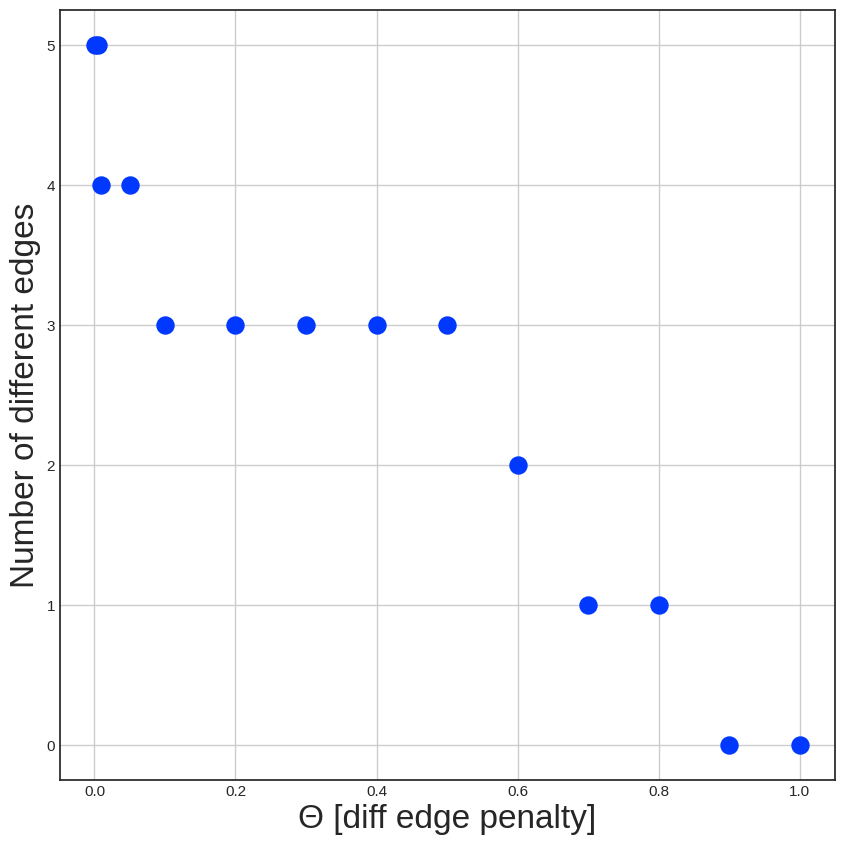

In [5]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    f, ax = plt.subplots(figsize=(10, 10))
    wt = ax.scatter(diffEdgeListTreat, errorList, color = "#0138FE", s = 150)
    ax.plot(ls="--", c=".3")
    plt.xlabel('Number of different edges', size = 24)
    plt.ylabel('Error', size = 24)
    plt.show()

with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    f, ax = plt.subplots(figsize=(10, 10))
    wt = ax.scatter(thetaRange, diffEdgeListTreat, color = "#0138FE", s = 150)
    ax.plot(ls="--", c=".3")
    plt.xlabel('Θ [diff edge penalty]', size = 24)
    plt.ylabel('Number of different edges', size = 24)
    plt.show()


In [5]:
%%capture
#RUN AN CNR EXAMPLE JUST TO SEE HOW BIG THE RMSE IS, AND WHAT THE VALUE MEANS< HOW MANY EDGES R DIFFFERENT< WHAT IS THE DIFFERENCE
#MATRIX, etc ...
cellPopulationList = ["wt","braf"]
cellNum = 500
noise = 0.3

pertNodes = None
missingNodes = None
pertubationIndices = get_index_list(allNodes, pertNodes)
dat, cell_annot, tx_annot = sample_raw_mra_data(wt, pertubationIndices, cellNum, PerturbDataList)
datB, cell_annotB, tx_annotB = sample_raw_mra_data(braf, pertubationIndices, cellNum, PerturbDataList)

sampledData = {"wt": [dat, cell_annot, tx_annot], "braf" : [datB, cell_annotB, tx_annotB]}
wtData = sampledData['wt']
datWt = wtData[0]
cell_annot = wtData[1]
tx_annot = wtData[2]

brafData = sampledData['braf']
datBraf = brafData[0]
cell_annotB = brafData[1]
tx_annotB = brafData[2]

#we implement this test without any perturbations
#we r only interested in how MRA compares to CNR
#therefore we make our lifes easier and do not handle these two objects
assert(cell_annot is None)
assert(tx_annot is None)
assert(cell_annotB is None)
assert(tx_annotB is None)

#we need to sample both popuations down, to ensure a fair comparison
#between MRA and CNR (each MRA simulation get as much data as the whole CNR)
#this is at most a disadvantage for CNR but ensures CNR does not only perform better
#due to twice as many cells (at least comapred to ONE MRA)

#datWt = datWt.sample(n = int(cellnum/2))
#datBraf = datBraf.sample(n = int(cellnum/2))

#actually prepare the orton data (e.g. adding noise) seperately for all ecll populations(wt, braf)
#this means each populations is scaled by its own control group (e.g. for inhibitions)
rglobList = []
rtotList = []
rglobWt, rtotWt, pDictWt = prepare_orton_data(datWt,'all', noise)
rglobList.append(rglobWt)
rtotList.append(rtotWt)
rglobBraf, rtotBraf, pDictBraf = prepare_orton_data(datBraf,'all', noise, None, None, "braf")
rglobList.append(rglobBraf)    
rtotList.append(rtotBraf)    

#make group annot: 'wt' ->'cellIds', , 'braf' ->'cellIds'
group_annot = {}
group_annot["wt"] = list(rglobWt.columns)
group_annot["braf"] = list(rglobBraf.columns)

#combine rglob and rtot
rglob = pd.concat(rglobList, axis=1)
rtot = pd.concat(rtotList, axis=1) 


theta = 0.1
#scd = scmra.ScData(rglob=rglob, rtot = rtot, cell_annot=cell_annot, tx_annot=tx_annot, group_annot= group_annot)

eta, scMraResult, edgeNumber = get_suitable_solution_fast(rglob, rtot, cell_annot, tx_annot, group_annot, 
            etaGuesses=30, reconstructionType = "CNR", theta = theta)

s = scMraResult

populationString = ""
for population in cellPopulationList:
    populationString += ','
    populationString += population



In [4]:
rloc_wt = s.rloc["wt"]
rloc_mut = s.rloc["braf"]

rloc_wt = reorder_rloc(rloc_wt)
rloc_mut = reorder_rloc(rloc_mut)
reconstructedDiff = ((rloc_wt - rloc_mut)**2)**0.5

#from these final two rlocs calculate RMSE
trueDiff = ((rloc_true - rloc_braf)**2)**0.5
trueDiff = reorder_rloc(trueDiff)
reconstructedDiff = reorder_rloc(reconstructedDiff)

rmse = calc_rmse(trueDiff, reconstructedDiff)

print(rmse)
print(reconstructedDiff - trueDiff)
print(reconstructedDiff)
print(trueDiff)
print(s.rloc)

0.04342773857841149
             Sos       Ras      Raf1       Mek       Erk   P90Rsk      PI3K  \
Sos     0.000000  0.000000  0.000000  0.000000  0.000000 -0.17754  0.000000   
Ras    -0.000113  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
Raf1    0.000000 -0.001281  0.000000  0.000000  0.000000  0.00000  0.000000   
Mek     0.000000  0.000000 -0.087174  0.000000  0.000000  0.00000  0.000000   
Erk     0.000000  0.000000  0.000000 -0.071617  0.000000  0.00000  0.000000   
P90Rsk  0.000000  0.000000  0.000000  0.000000 -0.082889  0.00000  0.000000   
PI3K    0.000000 -0.000162  0.000000  0.000000  0.000000  0.00000  0.000000   
Akt     0.000000  0.000000  0.000000  0.000000  0.000000  0.00000 -0.000042   
C3G     0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
Rap1    0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
bRaf    0.000000 -0.158611  0.000000  0.000000  0.000000  0.00000  0.000000   

             Akt  C3G      Rap1